
Logistic Regression Evaluation:
Accuracy: 0.5133333333333333
ROC-AUC Score: 0.5050055617352615
Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.75      0.62       155
           1       0.49      0.26      0.34       145

    accuracy                           0.51       300
   macro avg       0.51      0.51      0.48       300
weighted avg       0.51      0.51      0.48       300

Confusion Matrix:
 [[117  38]
 [108  37]]

Random Forest Classifier Evaluation:
Accuracy: 0.5033333333333333
ROC-AUC Score: 0.5042269187986652
Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.48      0.50       155
           1       0.49      0.53      0.51       145

    accuracy                           0.50       300
   macro avg       0.50      0.50      0.50       300
weighted avg       0.50      0.50      0.50       300

Confusion Matrix:
 [[74 81]
 [68 77]]


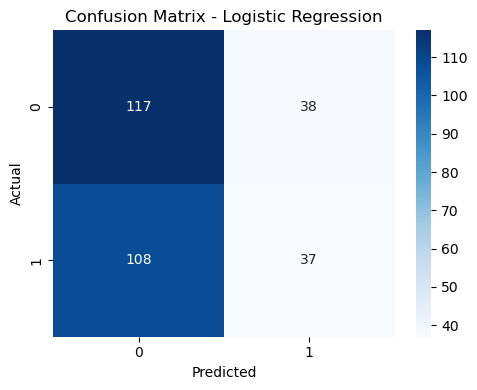

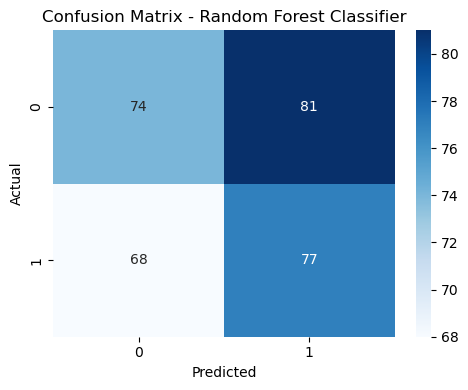

In [22]:
# --- Business Problem 1: Predicting Disease Diagnosis (Classification) ---

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
if not os.path.exists("images"):
    os.makedirs("images")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Load the dataset
df = pd.read_csv("healthcare_dataset.csv")

# Encode categorical features
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Smoking_Status'] = le.fit_transform(df['Smoking_Status'])
df['Disease_Diagnosis'] = df['Disease_Diagnosis'].map({'Yes': 1, 'No': 0})

# Features and target for classification
X_cls = df[['Age', 'BMI', 'Blood_Pressure', 'Cholesterol_Level', 'Blood_Sugar_Level', 'Smoking_Status']]
y_cls = df['Disease_Diagnosis']

# Train-test split
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_cls, y_cls, test_size=0.3, random_state=42)

# --- Logistic Regression Model ---
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_cls, y_train_cls)
y_pred_lr = lr_model.predict(X_test_cls)

# --- Random Forest Classifier ---
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_cls, y_train_cls)
y_pred_rf = rf_model.predict(X_test_cls)

# --- Evaluation Function for Classification ---
def evaluate_classification(y_true, y_pred, model_name):
    print(f"\n{model_name} Evaluation:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("ROC-AUC Score:", roc_auc_score(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))

# Evaluate both models
evaluate_classification(y_test_cls, y_pred_lr, "Logistic Regression")
evaluate_classification(y_test_cls, y_pred_rf, "Random Forest Classifier")

def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

# Save the image
    filename = f'images/confusion_matrix_{model_name.lower().replace(" ", "_")}.png'
    plt.tight_layout()
    plt.savefig(filename)

# Show and close
    plt.show()
    plt.close()

plot_confusion_matrix(y_test_cls, y_pred_lr, "Logistic Regression")
plot_confusion_matrix(y_test_cls, y_pred_rf, "Random Forest Classifier")


